In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/kaggle/input/pict-lab-dataset/HousingData.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [2]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [3]:
df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean())
df["ZN"] = df["ZN"].fillna(df["ZN"].mean())
df["INDUS"] = df["INDUS"].fillna(df["INDUS"].mean())
df["CHAS"] = df["CHAS"].fillna(df["CHAS"].mean())
df["AGE"] = df["AGE"].fillna(df["AGE"].mode()[0])  # mode returns Series
df["LSTAT"] = df["LSTAT"].fillna(df["LSTAT"].mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV',axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

2025-05-07 12:55:23.607270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746622523.797245      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746622523.850522      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746622535.359539      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/d

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history=model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100


I0000 00:00:1746622538.101134      57 service.cc:148] XLA service 0x7b666c00a0f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746622538.101643      57 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746622538.285561      57 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - loss: 774.7090 - mae: 25.2739

I0000 00:00:1746622538.783614      57 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 662.5949 - mae: 23.6077 - val_loss: 509.4760 - val_mae: 21.0736
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 600.4265 - mae: 22.5397 - val_loss: 469.2091 - val_mae: 20.0962
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 497.4987 - mae: 20.2044 - val_loss: 402.8472 - val_mae: 18.3678
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 421.0784 - mae: 17.9780 - val_loss: 299.1657 - val_mae: 15.2732
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 339.7437 - mae: 15.5478 - val_loss: 173.0433 - val_mae: 10.3920
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 230.4695 - mae: 12.0136 - val_loss: 86.7018 - val_mae: 6.9593
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151.3332 - mae: 9.6278 - val_loss: 72.0645 - val_mae: 6.8310
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 138.7238 - mae: 9.2101 - val_loss: 66.9888 - val_mae: 6.4068
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━

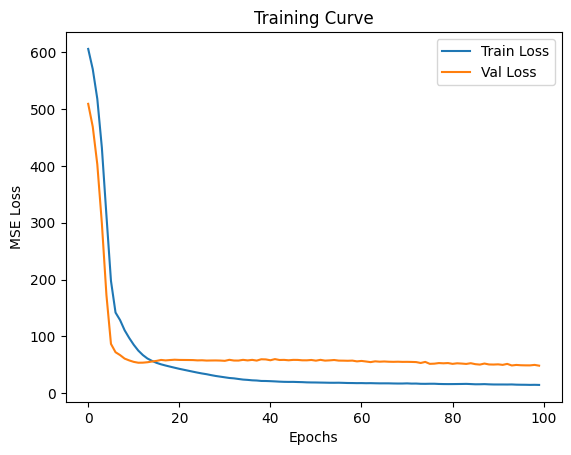

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training Curve')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

y_predict=model.predict(X_test)

# Standard regression metrics
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Mean Absolute Error (MAE): 2.5911713497311464
Mean Squared Error (MSE): 17.202500048143122
Root Mean Squared Error (RMSE): 4.147589667281845
R2 Score: 0.7654218927921
